# Optimation

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import numpy as np
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import and read the csv
opt = pd.read_csv('mushrooms.csv')
opt

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# Separate the Y variable (Labels)
y = opt['class']

In [10]:
# Separate the X variable, the features & dropping columns
x_opt = opt.drop(columns=["class","gill-size","veil-color","cap-surface",'ring-number','stalk-surface-above-ring','bruises',
                    'odor','stalk-surface-below-ring','gill-attachment','stalk-color-above-ring','veil-type','cap-color'])


In [11]:
from sklearn.preprocessing import LabelEncoder
label_model = LabelEncoder()
y_encoded_opt = label_model.fit_transform(y)
y_encoded_opt

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
# View y Variable Series
y_encoded_opt[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [13]:
# View x Variable
x_opt[:10]

,cap-shape,gill-spacing,gill-color,stalk-shape,stalk-root,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,c,k,e,e,w,p,k,s,u
1,x,c,k,e,c,w,p,n,n,g
2,b,c,n,e,c,w,p,n,n,m
3,x,c,n,e,e,w,p,k,s,u
4,x,w,k,t,e,w,e,n,a,g
5,x,c,n,e,c,w,p,k,n,g
6,b,c,g,e,c,w,p,k,n,m
7,b,c,n,e,c,w,p,n,s,m
8,x,c,p,e,e,w,p,k,v,g
9,b,c,g,e,c,w,p,k,s,m


In [14]:
# Creating dummy variables for x features
x_dummies_opt = pd.get_dummies(x,dtype=float)
x_dummies_opt

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,gill-spacing_c,gill-spacing_w,gill-color_b,gill-color_e,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_dummies_opt, y_encoded_opt, random_state=78)

In [20]:
# Initializing the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_opt = LogisticRegression()
log_reg_opt

LogisticRegression()

In [24]:
# Train the data
log_reg_opt_model = log_reg_opt.fit(x_train, y_train)

In [26]:
# Perform prediction using the test dataset
y_pred_opt = log_reg_opt_model.predict(x_test)

In [28]:
# Show the Confusion Matrix
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_opt)}")

# Calculating the accuracy of the model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print("Accuracy:", accuracy_opt)

#Classification Report
print("Classification Report", classification_report(y_test, y_pred_opt))

Confusion Matrix : [[1035   13]
 [   8  975]]
Accuracy: 0.9896602658788775
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1048
           1       0.99      0.99      0.99       983

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



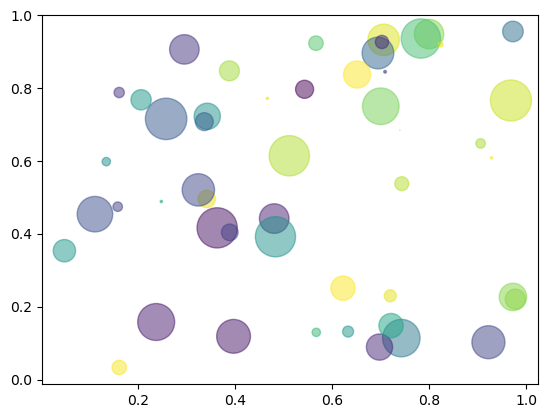

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

<Axes: >

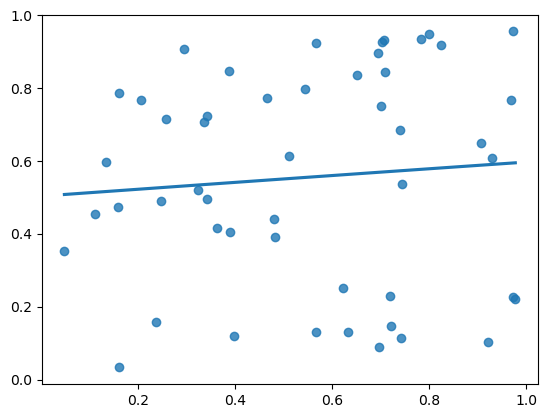

In [38]:
import seaborn as sns

sns.regplot(x=x, y=y, data=opt, logistic=True, ci=None)

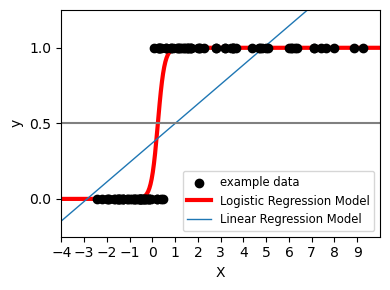

In [45]:
# Logistic function
#Shown in the plot is how the logistic regression would, in this synthetic dataset, classify values as either 0 or 1, i.e. class one or two, using the logistic curve.



import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
x = np.random.normal(size=n_samples)
y = (x > 0).astype(float)
x[x > 0] *= 4
x += 0.3 * np.random.normal(size=n_samples)

x = x[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(x, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(x.ravel(), y, label="example data", color="black", zorder=20)
x_test = np.linspace(-5, 10, 300)
loss = expit(x_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(x_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(x, y)
plt.plot(
    x_test,
    ols.coef_ *x_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()